# <center>**Improving Employee Retention by Predicting Employee Attrition Using Machine Learning 💼📊**</center>

---

## Project Description:
In this project, we aim to tackle the critical issue of employee attrition by leveraging the power of machine learning. Employee retention is not only crucial for the well-being of the workforce but also for the success and stability of any organization. We will go through the following steps to achieve this:



1. Data Preprocessing 📦:

  * Collect and clean employee data, ensuring data quality and consistency.
  * Handle missing values, outliers, and duplicates.
  * Transform categorical data into numerical formats.
  * Feature engineering to extract relevant information.

2. Annual Report on Employee Number Changes 📈:

  * Analyze historical data to create an annual report on employee count changes.
  * Identify patterns, trends, and seasonality in the data.
  * Visualize insights to provide a comprehensive view of employee dynamics.

3. Resign Reason Analysis 📋:

  * Explore the reasons behind employee resignations.
  * Conduct sentiment analysis on resignation letters or feedback forms.
  * Identify common themes and issues leading to attrition.

4. Automated Resign Behavior Prediction 🤖:

  * Train machine learning models on historical data to predict potential resignations.
  * Utilize predictive features such as job satisfaction, salary, tenure, and more.
  * Evaluate and fine-tune models to improve prediction accuracy.

5. Deployment and Presentation 🚀🎤:

  * Deploy the machine learning model within the organization to monitor employee attrition in real-time.
  * Create a dashboard or user interface for HR personnel to access predictions.
  * Prepare a comprehensive presentation of the project findings and insights to share with relevant stakeholders.


## Libraries and Tools:
For this project, you will need a variety of libraries and tools, including but not limited to:

* **Python**: The primary programming language for data analysis and machine learning.
* **NumPy and Pandas**: For data manipulation and analysis.
* **Scikit-Learn**: To build and evaluate machine learning models.
* **Matplotlib and Seaborn**: For data visualization.
Natural Language Processing (NLP) Libraries (e.g., NLTK or SpaCy) for text analysis in resignation letters.
* **Jupyter Notebooks**: For interactive data exploration and model development.
* **GitHub** or other version control systems for collaboration and code management.
Remember to keep track of your progress, document your work, and collaborate with HR and relevant departments to ensure your model aligns with the company's goals and policies.

This project has the potential to significantly impact employee retention and overall organizational success. 📈👥🚀 Good luck!







## **📚Import Library📚**

every library that we need its gonna be packed in this code block below.

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

!pip install -U scikit-learn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [22]:
#setting the figure display for the Visualization
rcParams['figure.figsize'] = 20,10
rcParams['lines.linewidth'] = 2.5
# rcParams['xticks.rotation'] = 25
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

##**Data Preparation**

in this step we gonna go ahead import our data from google drive into this project and understanding what the data can offer for us into a model

###Acces the Drive

In [23]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/dataset.xlsx'
sheet_name = 'hr_data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df = pd.read_excel(file_path, sheet_name=sheet_name)

df.head()

,Username,EnterpriseID,MaritalStatus,Gender,EmploymentStatus,Occupation,CareerLevel,EmployeePerformance,RegionOfOrigin,HiringPlatform,...,PhoneNumber,Email,EducationLevel,HasWorkExperience,JoinedLOPProgram,ResignationReason,DateOfBirth,HiringDate,EmployeeEvaluationDate,ResignationDate
0,spiritedPorpoise3,111065,Not_married,Male,Outsource,Software Engineer (Back End),Freshgraduate_program,Very_good,Mumbai,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Masters,1,1.0,still_working,1972-07-01,2011-01-10,2016-02-15,-
1,jealousGelding2,106080,Not_married,Male,FullTime,Data Analyst,Freshgraduate_program,Very_poor,Delhi,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Bachelor,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16 00:00:00
2,pluckyMuesli3,106452,Married,Male,FullTime,Software Engineer (Front End),Freshgraduate_program,Good,Mumbai,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Masters,1,1.0,working_hours,1974-01-07,2011-01-10,2016-01-10,2014-09-24 00:00:00
3,stressedTruffle1,106325,Not_married,Male,Outsource,Software Engineer (Front End),Freshgraduate_program,Good,Hyderabad,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Bachelor,1,0.0,still_working,1979-11-24,2014-02-17,2020-02-04,-
4,shyTermite7,111171,Not_married,Female,FullTime,Product Manager,Freshgraduate_program,Good,Mumbai,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Bachelor,1,0.0,career_change,1974-11-07,2013-11-11,2020-01-22,2018-09-06 00:00:00


In [25]:
df.shape

(287, 25)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Username                       287 non-null    object        
 1   EnterpriseID                   287 non-null    int64         
 2   MaritalStatus                  287 non-null    object        
 3   Gender                         287 non-null    object        
 4   EmploymentStatus               287 non-null    object        
 5   Occupation                     287 non-null    object        
 6   CareerLevel                    287 non-null    object        
 7   EmployeePerformance            287 non-null    object        
 8   RegionOfOrigin                 287 non-null    object        
 9   HiringPlatform                 287 non-null    object        
 10  EngagementSurveyScore          287 non-null    int64         
 11  EmployeeSatisfactio

so appearently in this dataset there are 287 rows and 25 columns in the dataset. the columns itself is enough for us to exactly performing the model, but since there is still a slight problem like there is still missing values that we have to handle.

In [27]:
# Loop through each column
for column_name in df.columns:
    unique_values = df[column_name].unique()
    unique_values_str = ", ".join(map(str, unique_values))

    print(f"Unique values in '{column_name}':\n == {unique_values_str} == \n")

Unique values in 'Username':
 == spiritedPorpoise3, jealousGelding2, pluckyMuesli3, stressedTruffle1, shyTermite7, emptyMacaw4, madZebra1, cynicalMandrill7, lyingMussel8, enviousMoth4, puzzledCake4, grizzledSnipe7, yearningBagels0, sheepishSheep9, madWildfowl7, enviousSalami4, pacifiedRaisins7, wrathfulMagpie6, hushedSeahorse7, guiltyMoth4, peacefulCoati5, dejectedPolenta7, needfulLeopard2, offendedIguana0, pluckyHoopoe3, needySyrup4, forsakenOwl1, pluckyApples4, guiltySnail8, grizzledFlamingo9, worriedSyrup7, somberBoars0, giddyMallard9, madFerret4, mereCaribou1, decimalAbalone6, blissfulMussel3, ardentLapwing0, peskyTeal7, blissfulHyena1, solidMacaw1, cautiousPolenta9, excludedPorpoise4, shamefulIguana0, shySyrup7, forsakenCow7, grumpyFish4, wingedPorpoise5, soreCaribou0, needfulCardinal0, giddyCheetah9, hushedOil9, crummyPudding5, selfishBasmati2, adoringCardinal9, importedApricots7, grizzledCod7, insecureShads2, wornoutChamois3, lazyToucan3, cockyTeal5, puzzledBagels7, debonairPlov

# **🧹Data preprocessing🧹**

so now that we already know and really understand how is the data being sturctured, now let's clean the dataset so that we can actually be able to make it through modelling step.

###Handling missing values

In [28]:
# Menghitung jumlah missing values per kolom
missing_values_count = df.isnull().sum()

missing_values_count

,0
Username,0
EnterpriseID,0
MaritalStatus,0
Gender,0
EmploymentStatus,0
Occupation,0
CareerLevel,0
EmployeePerformance,0
RegionOfOrigin,0
HiringPlatform,0


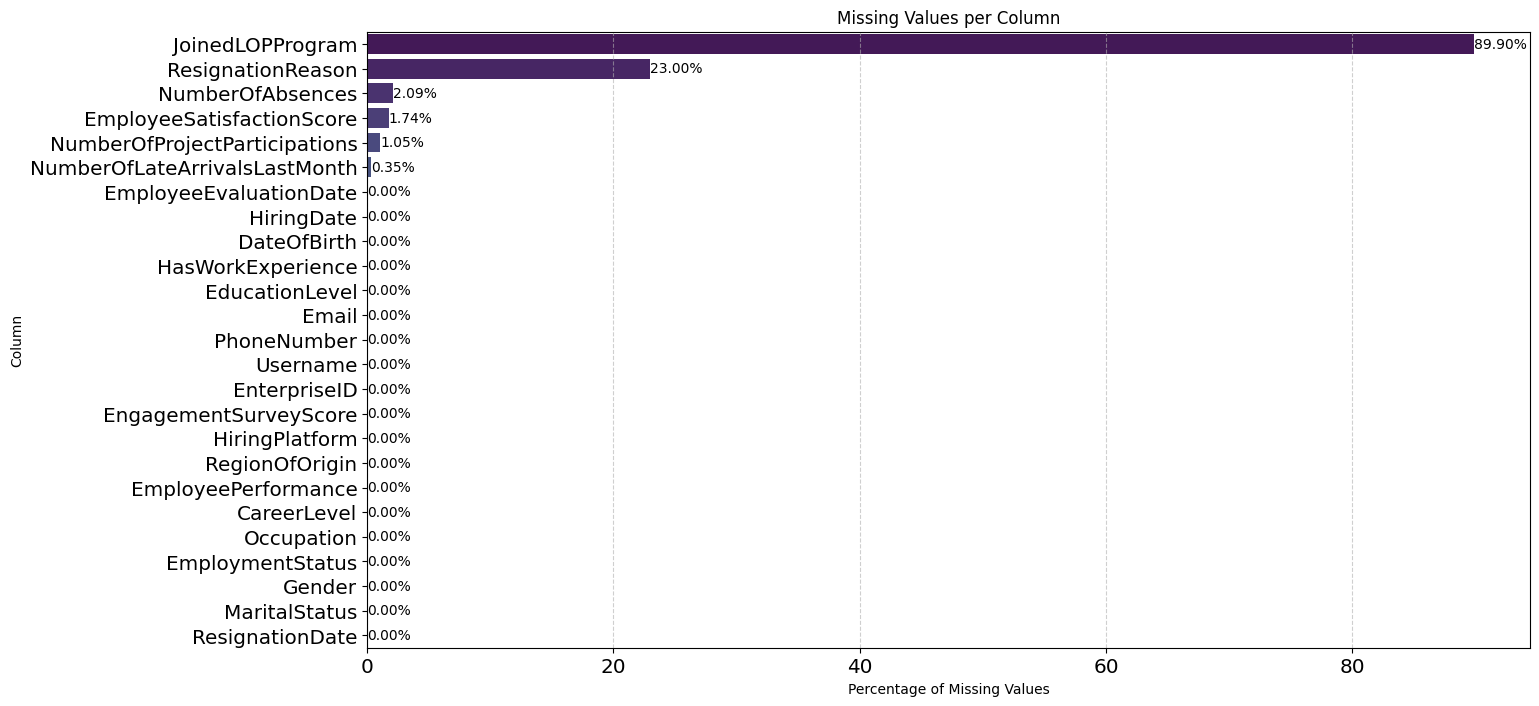

In [29]:
# Calculate the percentage of missing values in each column
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# Sort columns by the percentage of missing values in descending order
missing_values_percentage = missing_values_percentage.sort_values(ascending=False)

# Create the horizontal bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x=missing_values_percentage, y=missing_values_percentage.index, palette="viridis")

# Add percentage labels to the bars
for index, value in enumerate(missing_values_percentage):
    plt.text(value, index, f'{value:.2f}%', va='center', fontsize=10)

plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Missing Values per Column')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

* **Employee Satisfaction Score**:

  * Step: Fill missing values with the mean value of the column.
  * Reason: Filling missing values with the mean value can provide a reasonable estimate without significantly impacting the data distribution.

* **Project Participation Count**:

  * Step: Fill missing values with the median value of the column.
  * Reason: Using the median value helps avoid the influence of outliers or extreme values when filling missing values.

* **Number of Late Arrivals in the Last Month**:

  * Step: Fill missing values with the mean value of the column.
  * Reason: Using the mean value can provide a reasonable estimate without significantly affecting the data distribution.

* **Number of Absences**:

  * Step: Delete rows with missing values in this column.
  * Reason: The number of missing values in this column is substantial (6), so deleting rows with missing values can help maintain the integrity of the remaining data.

* **Participate in LOP Program**:

  * Step: Delete this column from the DataFrame.
  * Reason: This column has a very large number of missing values (258), and it does not significantly contribute to the analysis. Removing this column will not affect the essential information in the dataset.

* **Reason for Resignation**:

  * Step: Fill missing values with "Other," indicating that the reason for resignation is unknown or does not fall into predefined categories.
  * Reason: Filling missing values with "Other" helps retain the information that the reason for resignation is unknown, preserving the potential contribution of that data.

In [30]:
#set the categorical columns
categorical_columns = ['MaritalStatus', 'Gender', 'EmploymentStatus', 'Occupation', 'CareerLevel', 'RegionOfOrigin', 'HiringPlatform', 'EducationLevel', 'HasWorkExperience', 'ResignationReason']
#set the numerical columns
numeric_columns = ['EngagementSurveyScore', 'EmployeeSatisfactionScore', 'NumberOfProjectParticipations', 'NumberOfLateArrivalsLastMonth', 'NumberOfAbsences']

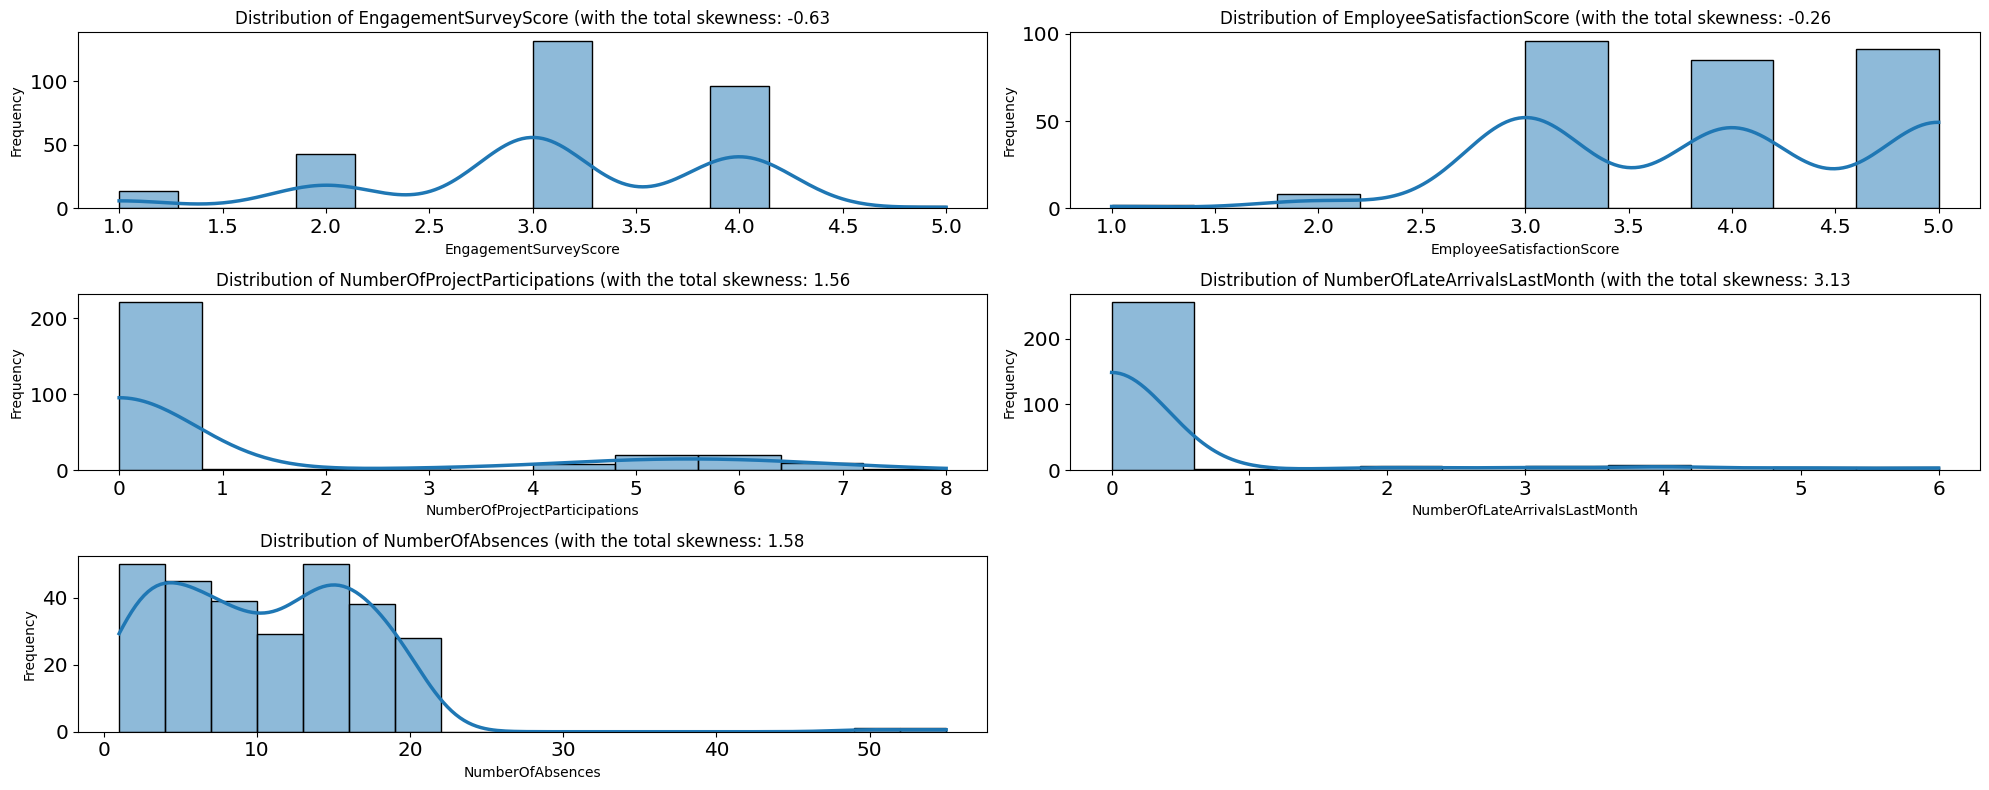

In [31]:
fig, ax = plt.subplots(3, 2, figsize=(20, 8))
ax = ax.flatten()

# Setting the skew for numerical columns
for i, column_name in enumerate(numeric_columns):
    skewness = df[column_name].skew()

    # Setting the histogram plot
    sns.histplot(data=df, x=column_name, kde= True, ax=ax[i])
    ax[i].set_title(f'Distribution of {column_name} (with the total skewness: {skewness:.2f}')
    ax[i].set_xlabel(column_name)
    ax[i].set_ylabel('Frequency')

# Hide any empty subplots
for i in range(len(numeric_columns), 6):
    fig.delaxes(ax[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


since it's really small amount of data we might just fill the data with median because on how really skew the data.

In [32]:
# List of columns to fill missing values with median
columns_to_fill_with_median = ['EmployeeSatisfactionScore', 'NumberOfProjectParticipations', 'NumberOfLateArrivalsLastMonth', 'NumberOfAbsences', 'JoinedLOPProgram']

# Fill missing values with median for the specified columns
for column in columns_to_fill_with_median:
    # Calculate the median only for the current column, excluding non-numeric values
    median_value = df[column].dropna().median()
    # Fill missing values in the current column with its median
    df[column] = df[column].fillna(median_value)

### Checking Outlier

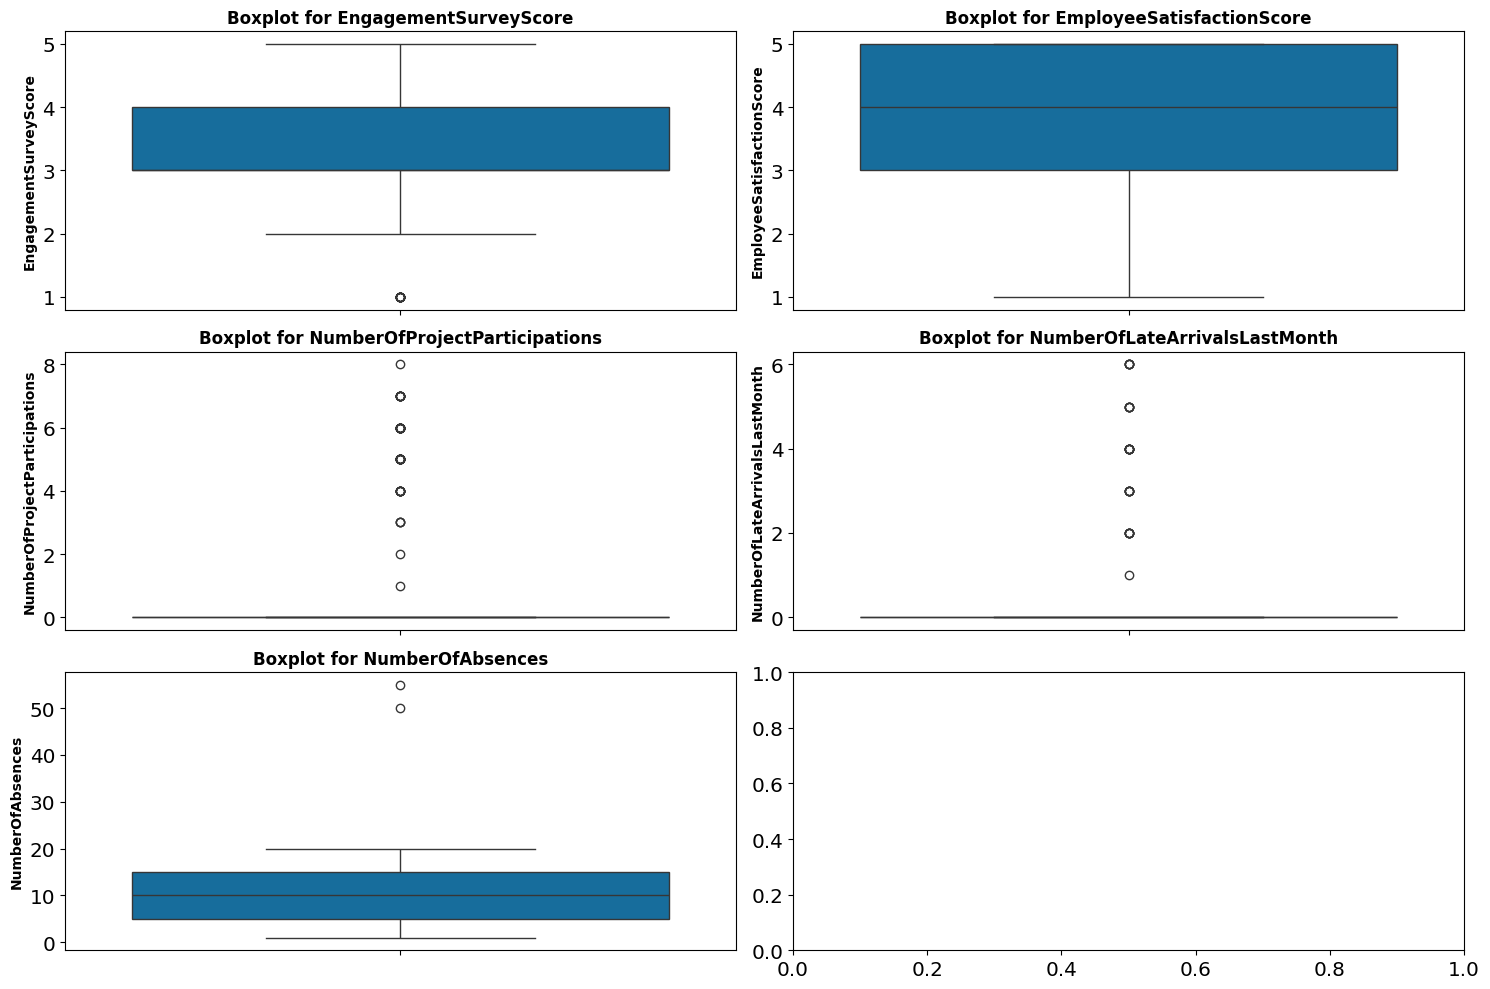

In [33]:
# Set a colorblind-friendly palette
palette = sns.color_palette("colorblind")

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical feature column
for i, column_name in enumerate(numeric_columns):
    # Create a vertical boxplot with the specified palette
    sns.boxplot(data=df, y=column_name, ax=axes[i], palette=palette)
    axes[i].set_title(f'Boxplot for {column_name}', fontweight='bold')
    axes[i].set_ylabel(column_name, fontweight='bold')
    axes[i].set_xlabel('')

# Hide any empty subplots
for i in range(len(numeric_columns), 4):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Checking The Duplicate Data

In [34]:
# Check for duplicate rows in the DataFrame
duplicates = df[df.duplicated()]

# If there are duplicates, print the duplicate rows
if not duplicates.empty:
    print("Duplicate Rows:")
    print(duplicates)
else:
    print("No duplicate rows found")

# Remove duplicates and keep the first occurrence
df.drop_duplicates(inplace=True)

No duplicate rows found


### Handling Incosistent data

in this step, we might gonna take a look a data who has weird unique values like maybe incorrect data or else, but first let's check the categoical data diagram.

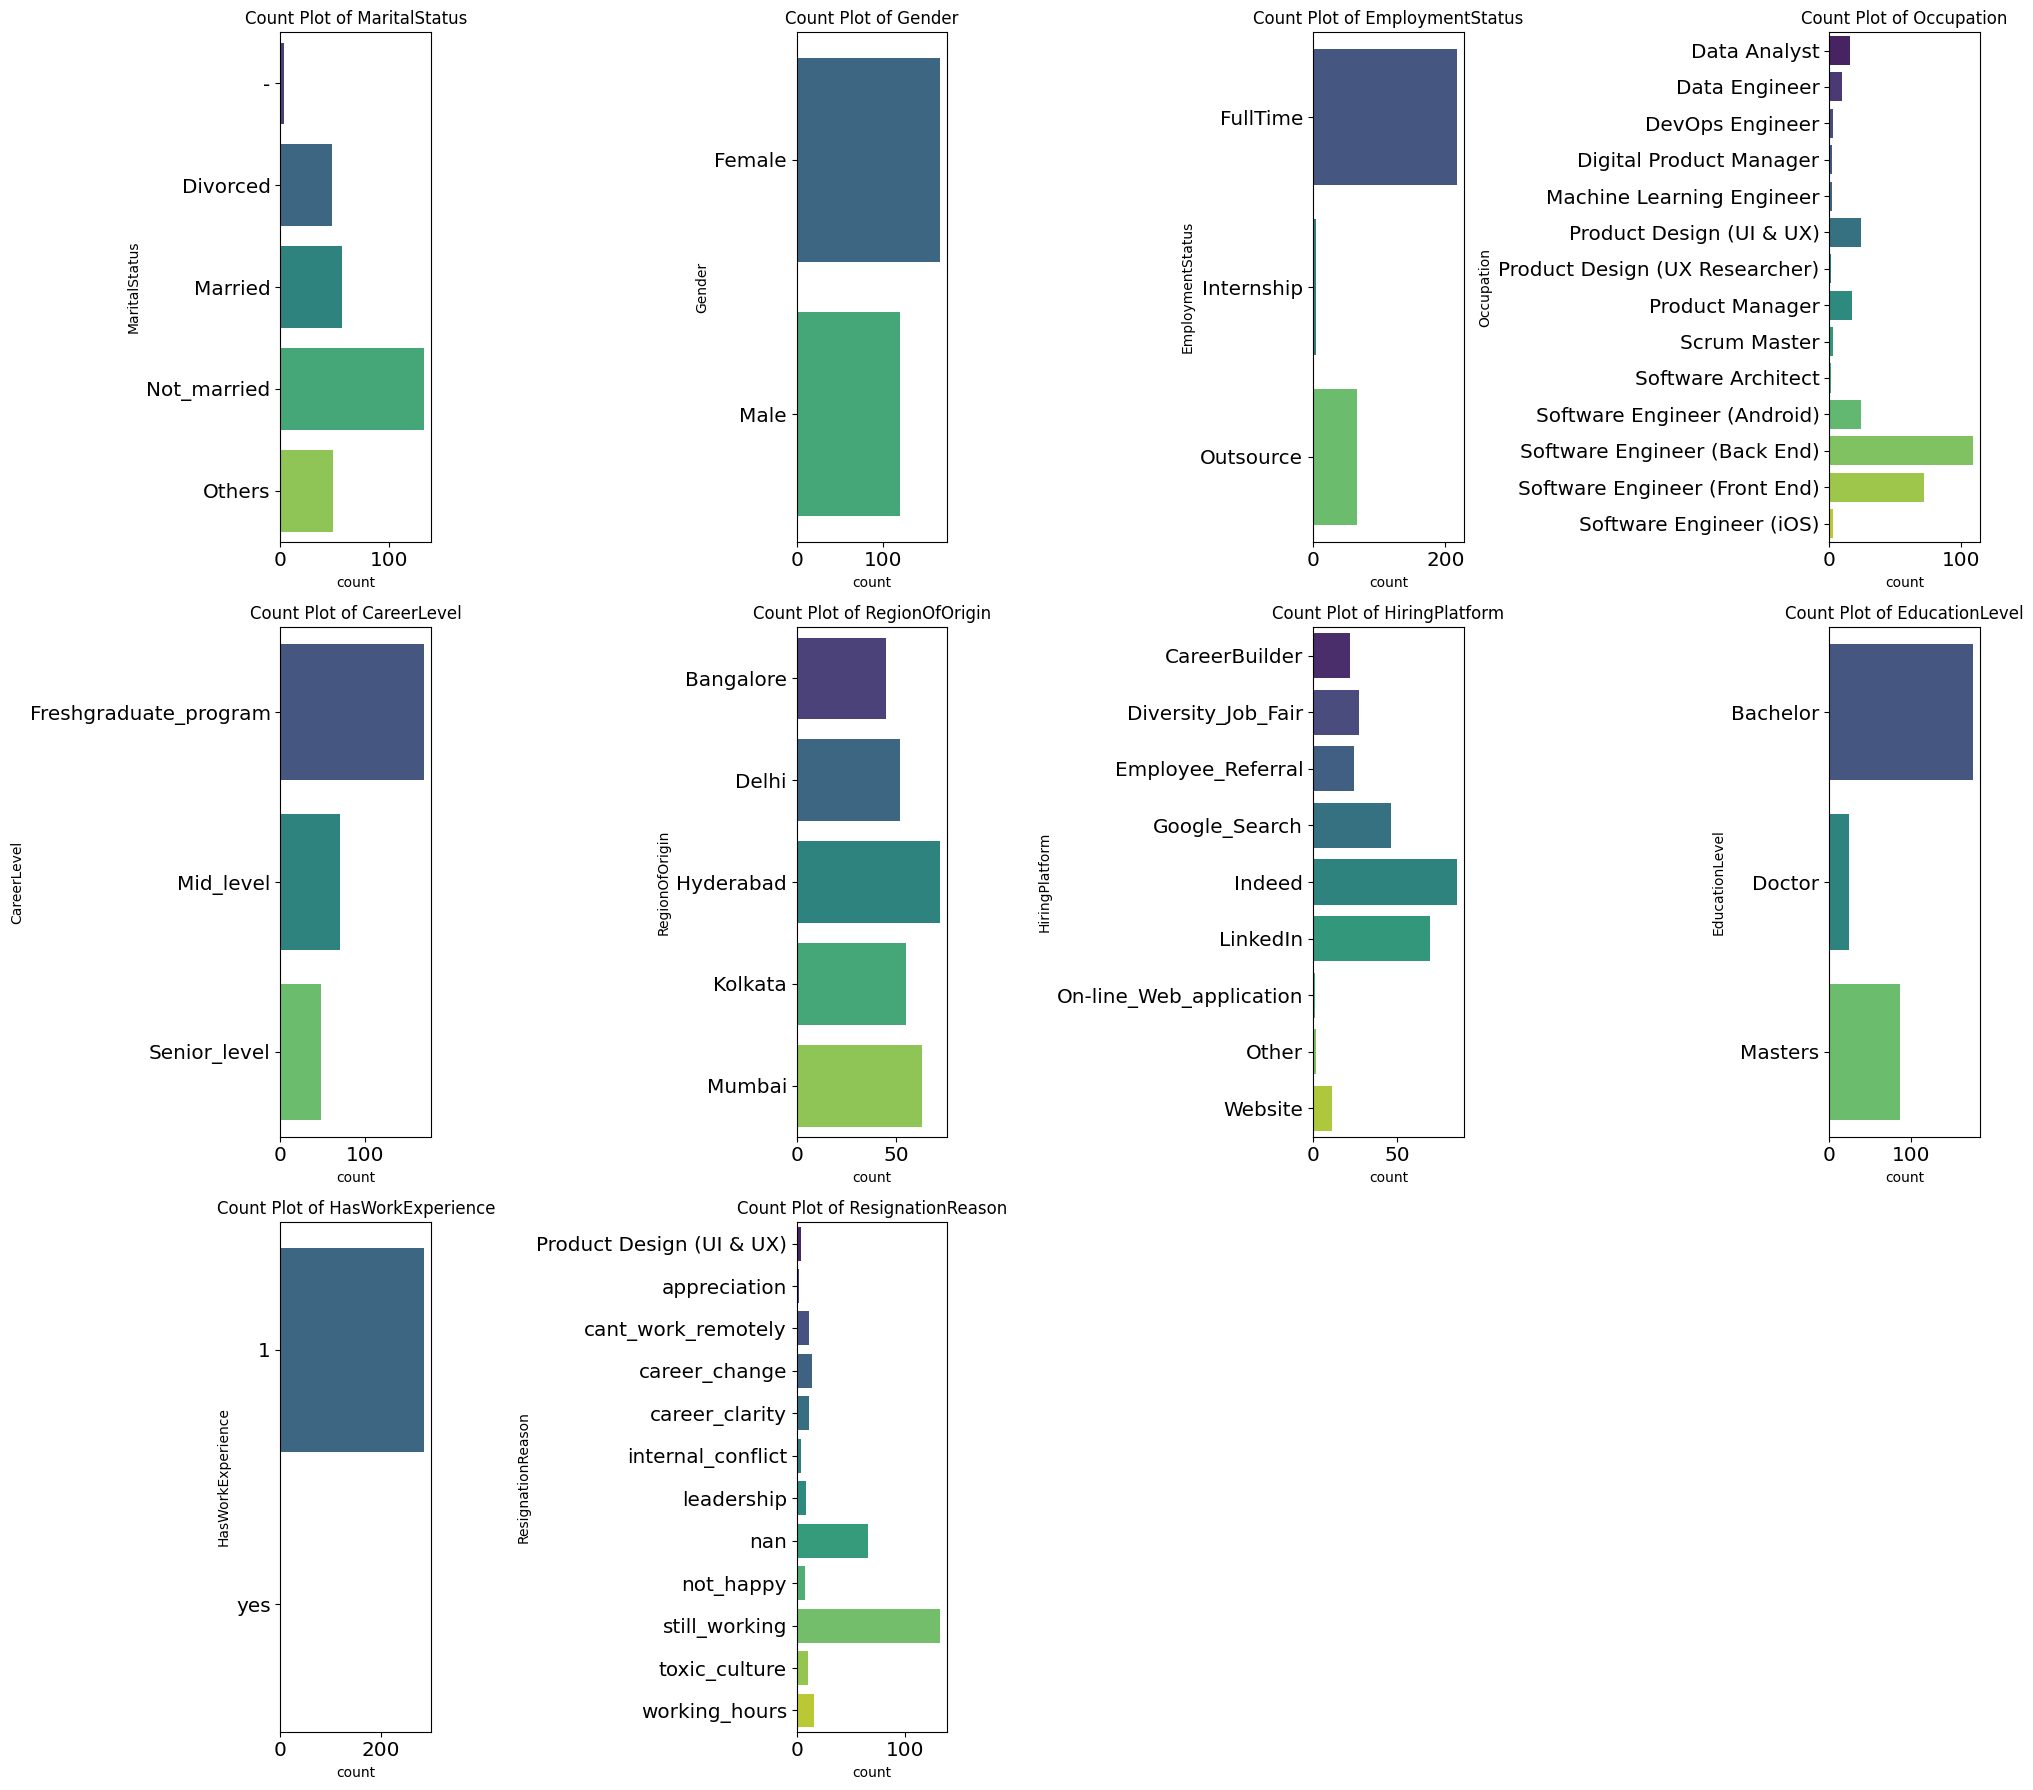

In [35]:
# Set the figure size
plt.figure(figsize=(20, 18))

# Create a 3x4 grid of subplots for count plots
for i, column in enumerate(categorical_columns):
    plt.subplot(3, 4, i + 1)

    # Convert the column to a string type
    df[column] = df[column].astype(str)

    # Calculate the count of each category and sort them in ascending order
    category_counts = df[column].value_counts().sort_index(ascending=True)

    # Create the count plot
    sns.countplot(data=df, y=column, order=category_counts.index, palette='viridis')

    # Set labels and title
    plt.xlabel('count')
    plt.ylabel(column)
    plt.title(f'Count Plot of {column}')

# Adjust the layout
plt.tight_layout()

# Show the subplots
plt.show()

If you look at the diagram above, for various columns there is data that must be tidied up, such as:

* for marital status column:

i will move the merged '-' data values to 'other'

* Column Ever worked:

the step is I will combine everything from the value 1 I combine to 'yes'

* column for reason of resignation:

step by step I will combine product design (UI & UX) into 'other'


then also create a new column for how many are still working and not

In [36]:
# Handling inconsistent data 'MaritalStatus'
df['MaritalStatus'] = df['MaritalStatus'].replace('-', 'Single')
df['MaritalStatus'] = df['MaritalStatus'].replace('Divorced', 'Single')
df['MaritalStatus'] = df['MaritalStatus'].replace('Others', 'Single')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Single')

# Handling inconsistent data 'HasWorkExperience'
df['HasWorkExperience'] = df['HasWorkExperience'].replace('1', 'yes')

# Handling inconsistent data in 'ResignationReason' column
df['ResignationReason'] = df['ResignationReason'].replace('Product Design (UI & UX)', 'Others')
df['ResignationReason'] = df['ResignationReason'].replace('nan', 'Others')

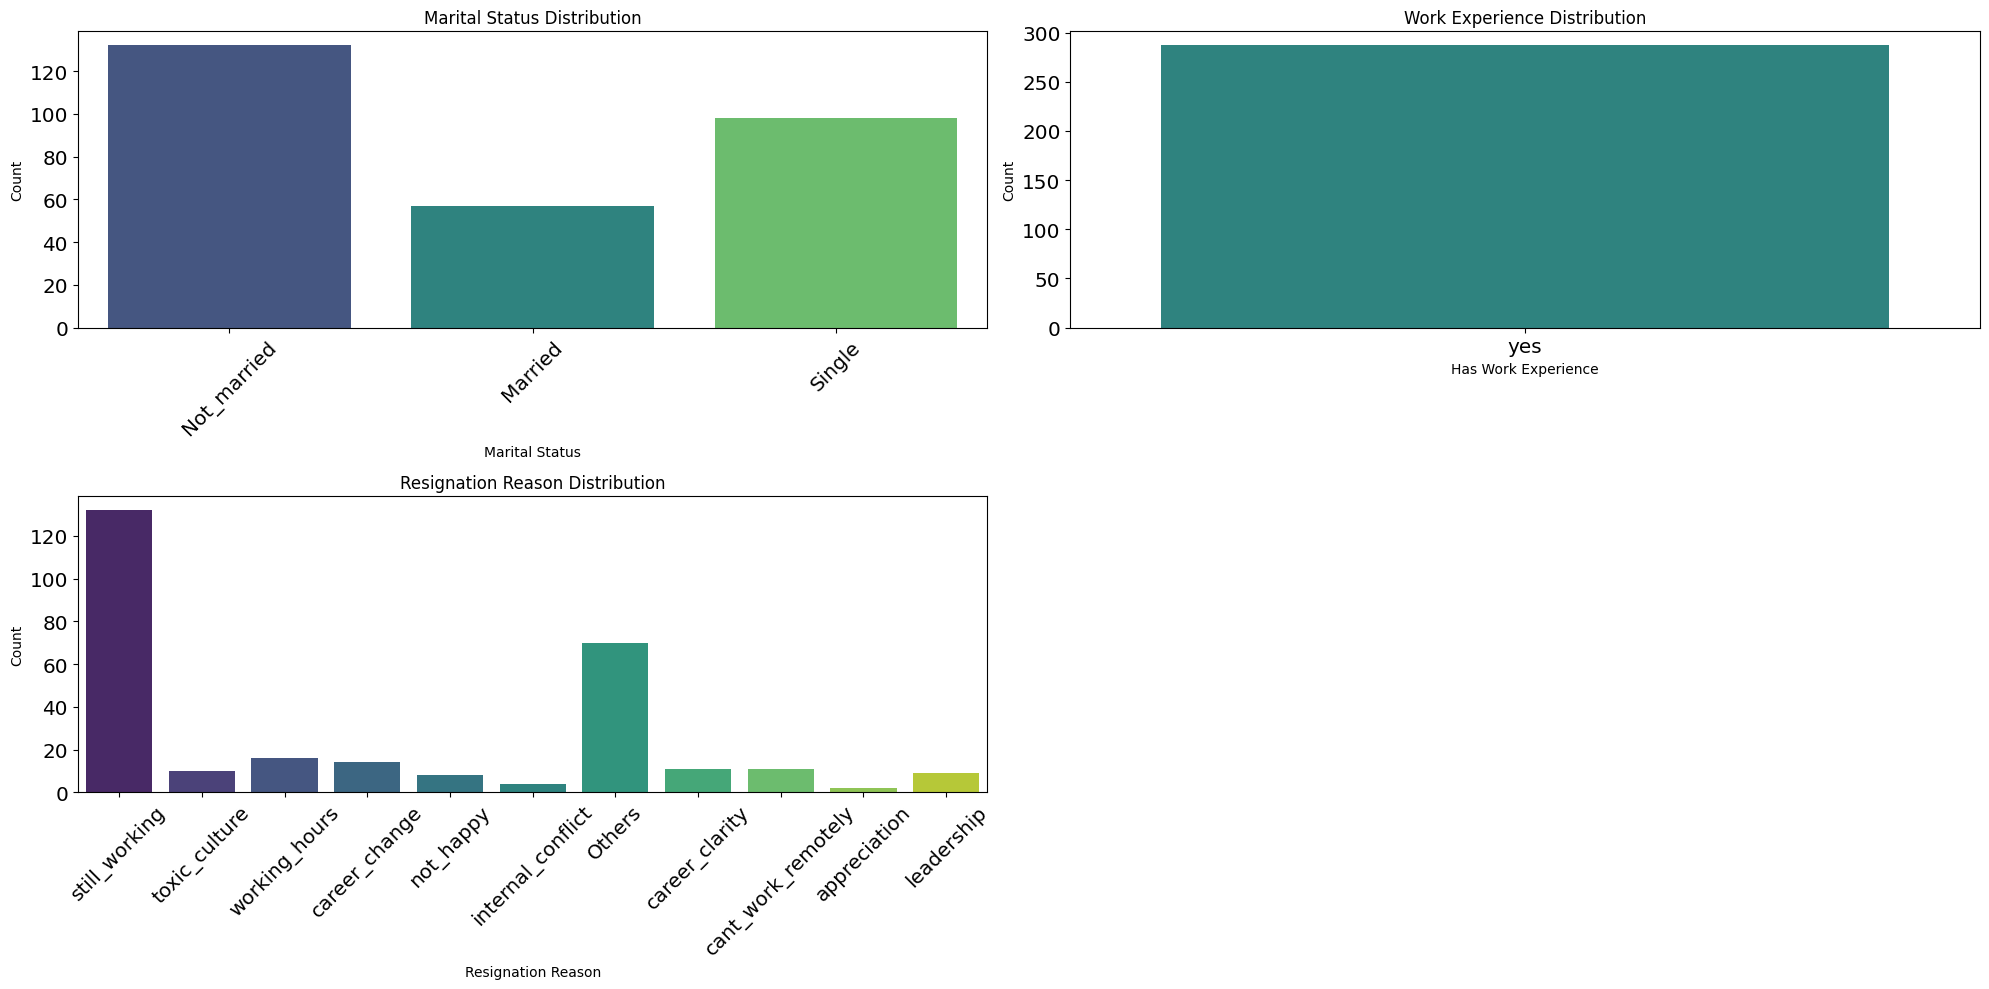

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

# Visualization of 'MaritalStatus' column after preprocessing
sns.countplot(data=df, x='MaritalStatus', palette='viridis', ax=ax[0, 0])
ax[0, 0].set_title('Marital Status Distribution')
ax[0, 0].set_xlabel('Marital Status')
ax[0, 0].set_ylabel('Count')
ax[0, 0].tick_params(axis='x', rotation=45)

# Visualization of 'HasWorkExperience' column after preprocessing
sns.countplot(data=df, x='HasWorkExperience', palette='viridis', ax=ax[0, 1])
ax[0, 1].set_title('Work Experience Distribution')
ax[0, 1].set_xlabel('Has Work Experience')
ax[0, 1].set_ylabel('Count')

# Visualization of 'ResignationReason' column after preprocessing
sns.countplot(data=df, x='ResignationReason', palette='viridis', ax=ax[1, 0])
ax[1, 0].set_title('Resignation Reason Distribution')
ax[1, 0].set_xlabel('Resignation Reason')
ax[1, 0].set_ylabel('Count')
ax[1, 0].tick_params(axis='x', rotation=45)

# Hide the last subplot (ax[1, 1]) since it's not used
ax[1, 1].axis('off')

# Set the display
plt.tight_layout()
plt.show()

## **🔨Feature Engineering🔨**

##work Status Column

In [38]:
# Create new column "EmploymentStatus"
df['EmploymentStatus'] = df['ResignationDate'].apply(lambda x: 'Still Employed' if x == '-' or pd.isnull(x) else 'Not Employed')

In [41]:
df['EmploymentStatus'].head()

,EmploymentStatus
0,Still Employed
1,Not Employed
2,Not Employed
3,Still Employed
4,Not Employed


##Hiring column

In [42]:
# Convert "HiringDate" column to datetime type
df['HiringDate'] = pd.to_datetime(df['HiringDate'])

# Convert "ResignationDate" column to datetime type
df['ResignationDate'] = pd.to_datetime(df['ResignationDate'], errors='coerce')

# Extract hiring year and resignation year
df['HiringYear'] = df['HiringDate'].dt.year
df['HiringMonth'] = df['HiringDate'].dt.month
df['HiringDay'] = df['HiringDate'].dt.day

df['ResignationYear'] = df['ResignationDate'].dt.year

###Age Employee Category column

In [43]:
from datetime import datetime

df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'])
current_year = datetime.now().year
df['EmployeeAge'] = current_year - df['DateOfBirth'].dt.year

bins = [0, 30, 40, float('inf')]
labels = ['Young', 'Middle', 'Senior']
df['AgeCategory'] = pd.cut(df['EmployeeAge'], bins=bins, labels=labels)

##served Duration Column

In [44]:
df['EmployeeEvaluationDate'] = pd.to_datetime(df['EmployeeEvaluationDate'])
df['HiringDate'] = pd.to_datetime(df['HiringDate'])
df['TimeInPosition'] = ((df['EmployeeEvaluationDate'] - df['HiringDate']).dt.days // 30).fillna(0)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Username                       287 non-null    object        
 1   EnterpriseID                   287 non-null    int64         
 2   MaritalStatus                  287 non-null    object        
 3   Gender                         287 non-null    object        
 4   EmploymentStatus               287 non-null    object        
 5   Occupation                     287 non-null    object        
 6   CareerLevel                    287 non-null    object        
 7   EmployeePerformance            287 non-null    object        
 8   RegionOfOrigin                 287 non-null    object        
 9   HiringPlatform                 287 non-null    object        
 10  EngagementSurveyScore          287 non-null    int64         
 11  EmployeeSatisfactio

#**📈Annual Report Analysis📈**

this is the step where we have to craete a daily report to our management to see if we can find any insight about our employee workflow and discuss it with HR or our personalia management

### Trend Plot for Incoming and Outgoing Employees

In [46]:
# 1. Create two aggregate tables for incoming and outgoing employees
incoming_employees = df['HiringYear'].value_counts().reset_index()
incoming_employees.columns = ['Year', 'Incoming Employees']

outgoing_employees = df['ResignationYear'].value_counts().reset_index()
outgoing_employees.columns = ['Year', 'Outgoing Employees']

# 2. Join the two tables based on the year of resignation and hiring using an outer join
annual_report = incoming_employees.merge(outgoing_employees, on='Year', how='outer')

# 3. Perform imputation on the empty year data
annual_report['Year'] = annual_report['Year'].fillna(0)
annual_report['Year'] = annual_report['Year'].astype(int)

# 4. Calculate the total number of employees who resigned, those who still remain, and the changes in each year
annual_report['Total Resigned'] = annual_report['Outgoing Employees'].cumsum()
annual_report['Total Remaining'] = annual_report['Incoming Employees'].cumsum() - annual_report['Total Resigned']
annual_report['Changes'] = annual_report['Total Remaining'] - annual_report['Total Resigned']

In [47]:
annual_report = annual_report.sort_values(by='Year')

annual_report

,Year,Incoming Employees,Outgoing Employees,Total Resigned,Total Remaining,Changes
0,2006,1.0,NaN,NaN,NaN,NaN
1,2007,2.0,NaN,NaN,NaN,NaN
2,2008,2.0,NaN,NaN,NaN,NaN
3,2009,7.0,NaN,NaN,NaN,NaN
4,2010,8.0,NaN,NaN,NaN,NaN
5,2011,76.0,NaN,NaN,NaN,NaN
6,2012,41.0,NaN,NaN,NaN,NaN
7,2013,43.0,5.0,5.0,175.0,170.0
8,2014,56.0,12.0,17.0,219.0,202.0
9,2015,31.0,8.0,25.0,242.0,217.0


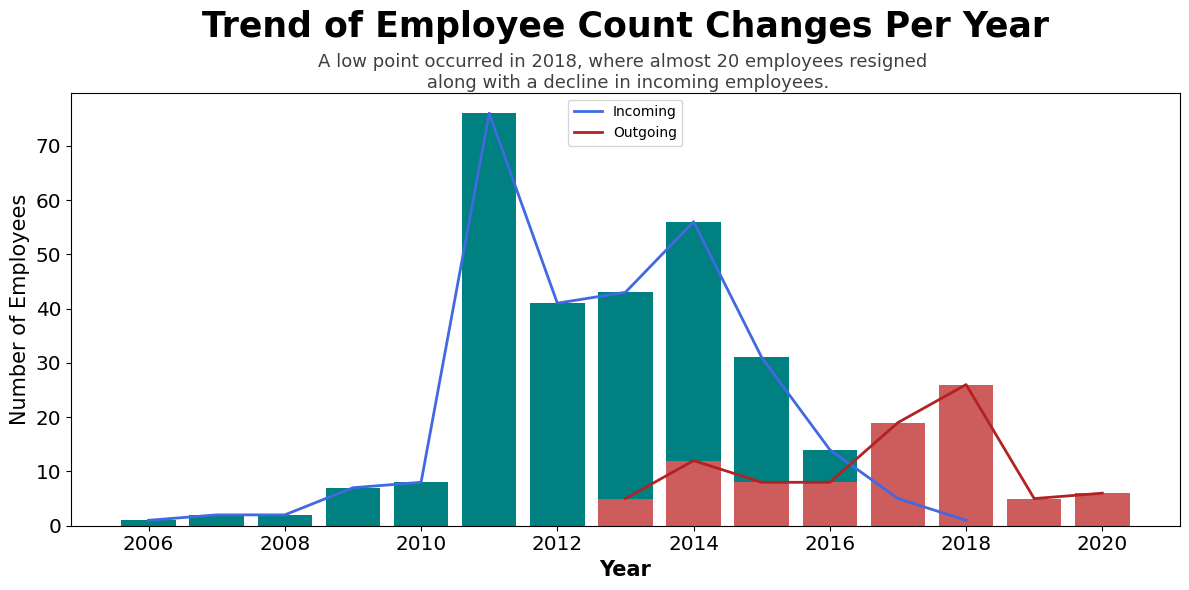

In [48]:
fig, ax = plt.subplots(figsize=(12, 6))

# Line and bar plot for incoming employees
sns.lineplot(data=annual_report, x='Year', y='Incoming Employees', label='Incoming', lw=2, ax=ax, color='royalblue')
ax.bar(annual_report['Year'], annual_report['Incoming Employees'], color='teal')
# Line and Bar chart for outgoing employees
sns.lineplot(data=annual_report, x='Year', y='Outgoing Employees', color='firebrick', label='Outgoing', lw=2, ax=ax)
ax.bar(annual_report['Year'], annual_report['Outgoing Employees'], color='indianred')

# Set the title for the plot
x_start, x_end = plt.gca().get_xlim()
y_start, y_end = plt.gca().get_ylim()
desc = 'A low point occurred in 2018, where almost 20 employees resigned \n along with a decline in incoming employees.'
plt.text((x_start+x_end)/2, y_end*1.01, desc, ha='center', fontsize=13, alpha=0.75)

# Set labels and title
ax.set_xlabel('Year', fontsize=15, fontweight='bold')
ax.set_ylabel('Number of Employees', fontsize=15)
ax.set_title('Trend of Employee Count Changes Per Year', fontsize=25, fontweight='bold', pad=40)

# Add legends for both line and bar chart
ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [49]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Waterfall(
        x=annual_report['Year'],
        y=annual_report['Changes'],
        text=annual_report['Changes'].apply(lambda x: f'{x:,.0f}'),
        measure=['relative'] * len(annual_report),
        base=0
    )
])

fig.update_layout(
    title="Employee Count Changes per Year",
    xaxis_title="Year",
    yaxis_title="Changes",
    font=dict(
        size=25,
        color='black'
    ),
    width=1300,
    height=900
)

fig.show()


Based on data on the number of employees entering and leaving each year, several insights can be drawn regarding the conditions of the employee workforce. The following are insights that can be obtained:

* The number of incoming employees experienced a significant increase from 2006 to 2011. However, after 2011, the growth trend in the number of incoming employees tends to decline slowly.

* The number of employees leaving has also increased from year to year. The trend of increasing the number of employees leaving can be of concern because it can indicate factors that influence employees' decisions to resign.

* Changes in the number of employees (the difference between the number of incoming and the number of outgoing) fluctuate from year to year. There are years where the change in the number of employees is negative, indicating an overall decrease in the number of employees.

Based on the insight above, the condition of the employee workforce may be worrying due to the downward trend in the growth of the number of employees entering and the increase in the number of employees leaving.

###percantage of employees that still work

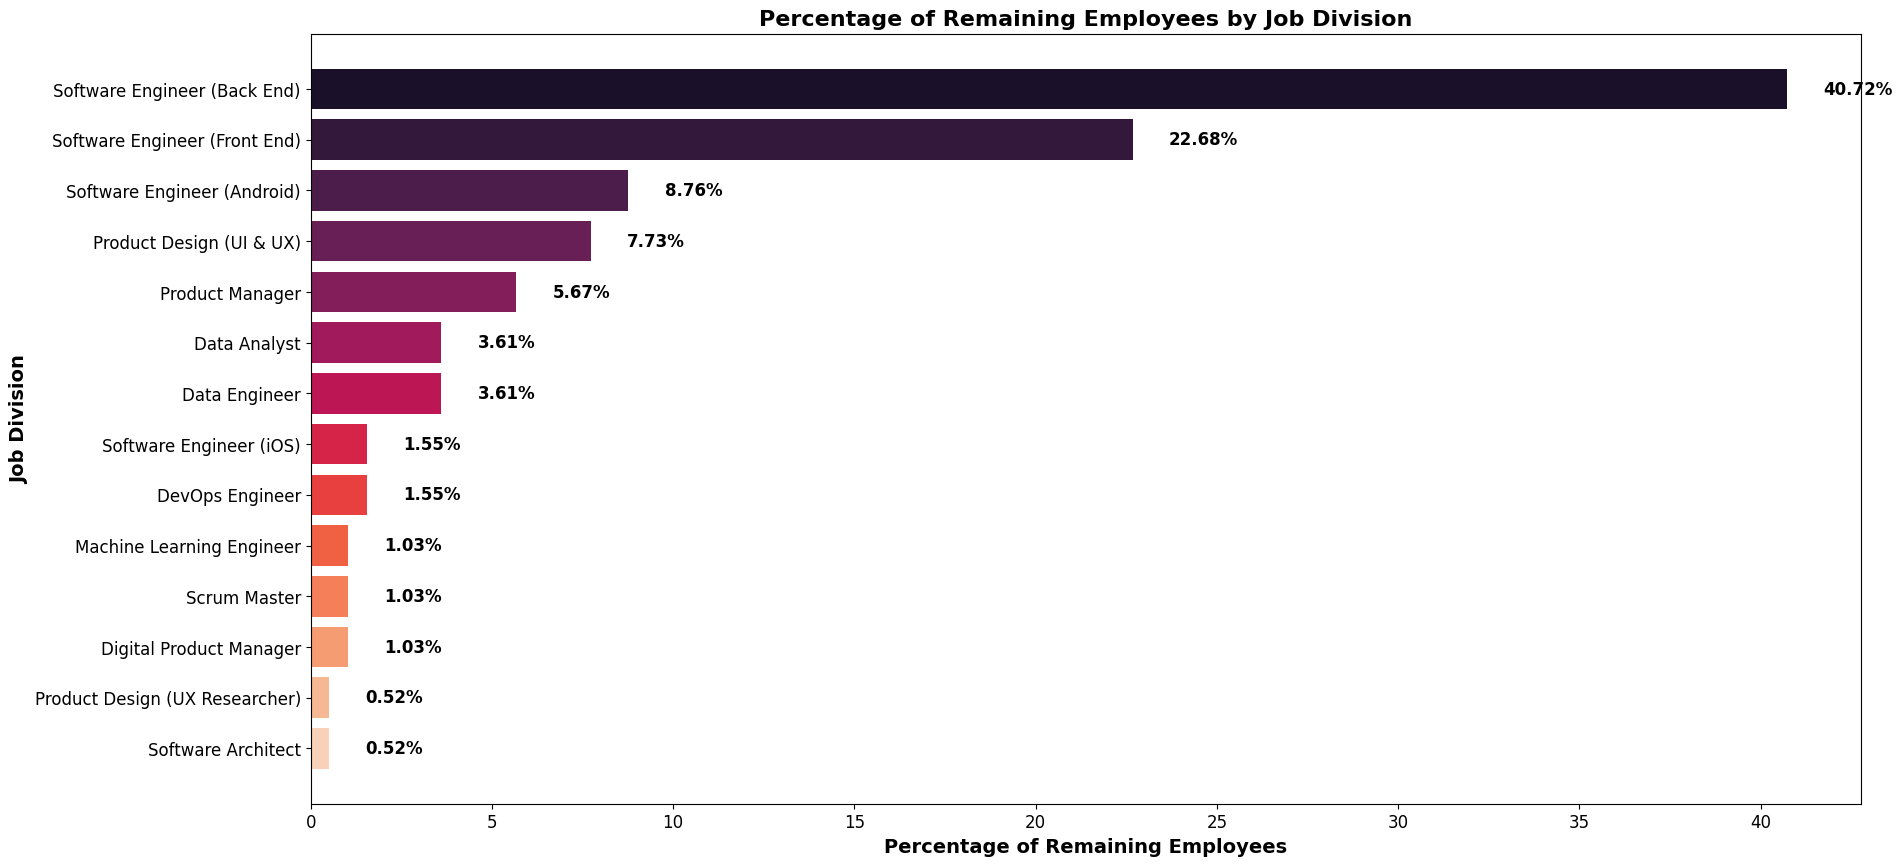

In [50]:
divisions = [
    'Product Design (UX Researcher)',
    'Software Architect',
    'Machine Learning Engineer',
    'Scrum Master',
    'Digital Product Manager',
    'Software Engineer (iOS)',
    'DevOps Engineer',
    'Data Analyst',
    'Data Engineer',
    'Product Manager',
    'Product Design (UI & UX)',
    'Software Engineer (Android)',
    'Software Engineer (Front End)',
    'Software Engineer (Back End)'
]

counts = [
    1, 1, 2, 2, 2, 3, 3, 7, 7, 11, 15, 17, 44, 79
]

total_employees = sum(counts)
percentages = [(count / total_employees) * 100 for count in counts]

# Sort divisions and percentages in ascending order by values
sorted_data = sorted(zip(divisions, percentages), key=lambda x: x[1], reverse=True)

divisions, percentages = zip(*sorted_data)

# Customize the color palette
colors = sns.color_palette('rocket', len(divisions))

# Create the horizontal bar chart
plt.barh(divisions, percentages, color=colors)
plt.xlabel('Percentage of Remaining Employees', fontsize=14, fontweight='bold')
plt.ylabel('Job Division', fontsize=14, fontweight='bold')
plt.title('Percentage of Remaining Employees by Job Division', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Reverse the order of divisions

# Add labels to the bars
for i, percentage in enumerate(percentages):
    plt.text(percentage + 1, i, f'{percentage:.2f}%', va='center', fontsize=12, fontweight='bold')

plt.show()

### Incoming and Outgoing Employees Based on Career

In [51]:
# Retrieve data on employees who have resigned
df_resigned = df[df['EmploymentStatus'] == 'Not Working']

# Create an aggregation table to calculate the number of employees who resigned based on career level, employee performance, and reasons for resigning
aggregation_table = df_resigned.groupby(['CareerLevel', 'EmployeePerformance', 'ResignationReason']).size().reset_index(name='NumberOfResignedEmployees')

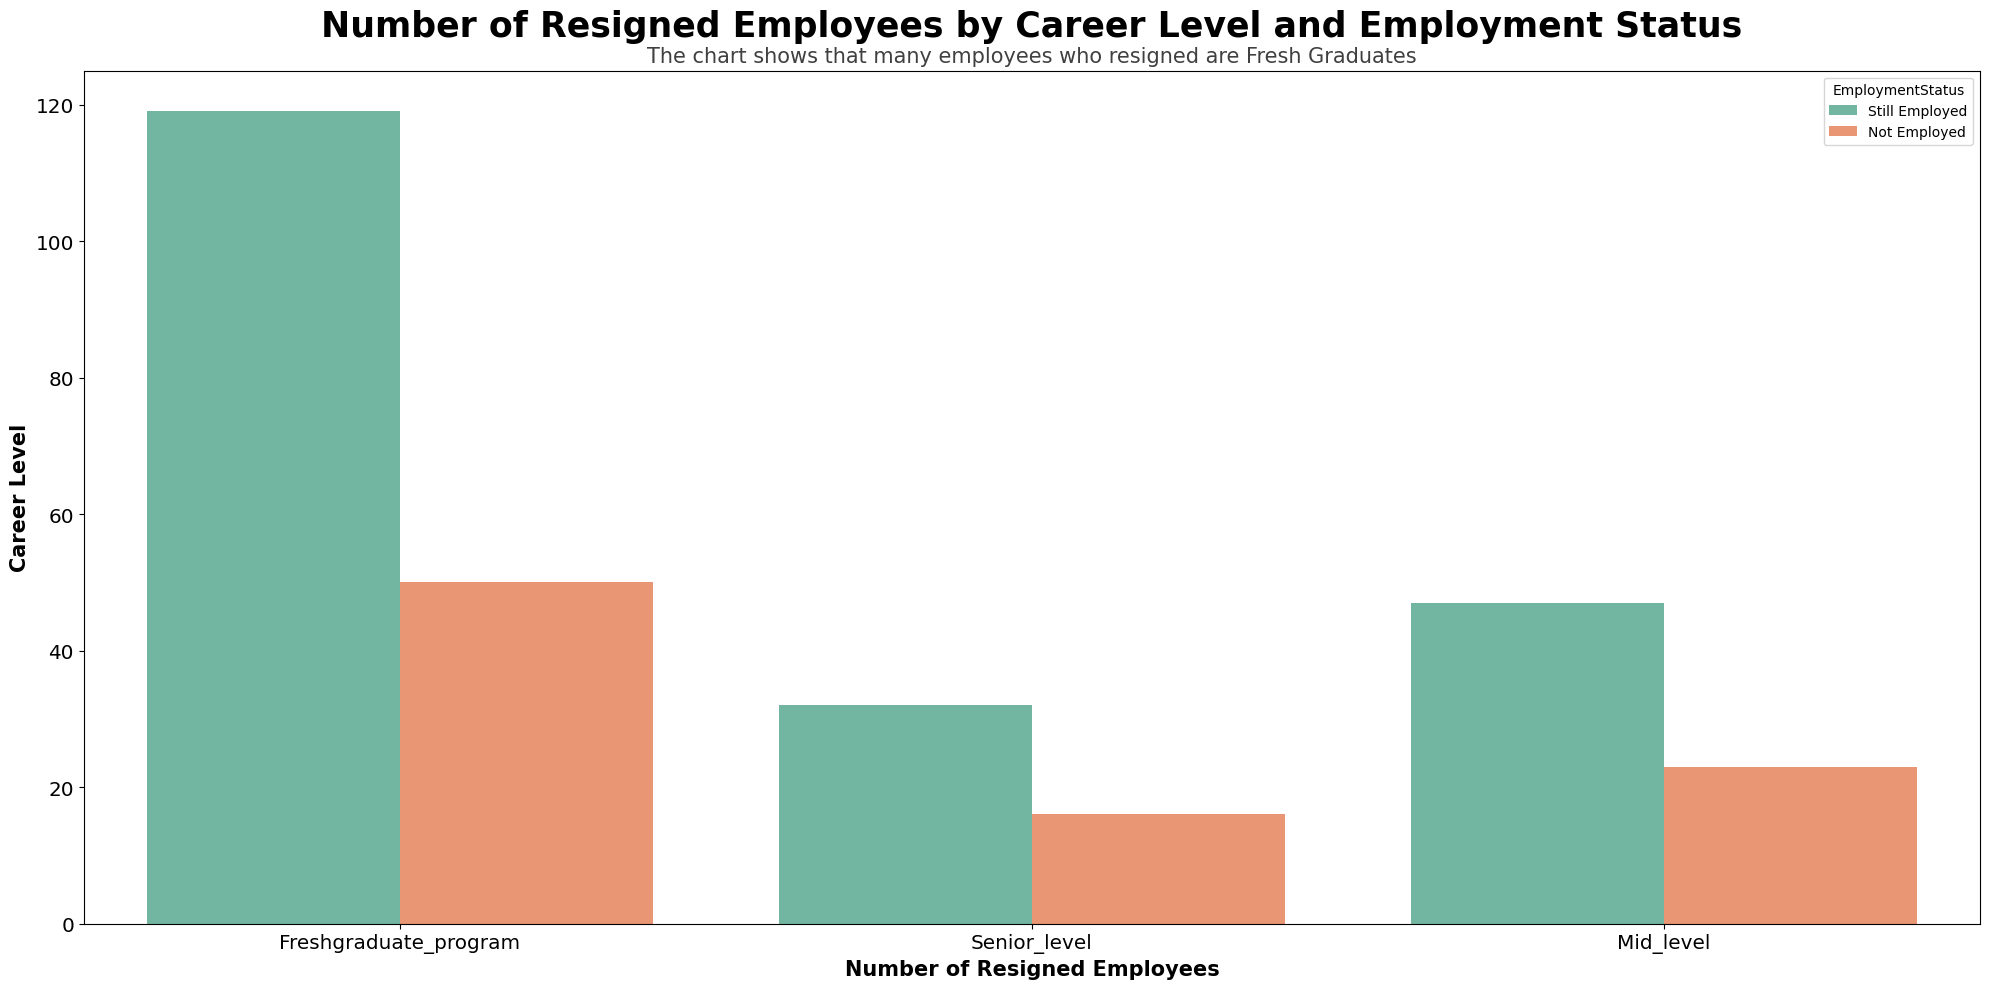

In [52]:
# Create a bar plot with "CareerLevel" on the y-axis and "EmploymentStatus" as hue
sns.countplot(data=df, x='CareerLevel', hue='EmploymentStatus', palette='Set2')

# Set the title and labels
x_start, x_end = plt.gca().get_xlim()
y_start, y_end = plt.gca().get_ylim()
desc = 'The chart shows that many employees who resigned are Fresh Graduates'
plt.text((x_start + x_end) / 2, y_end * 1.01, desc, ha='center', fontsize=15, alpha=0.75)

plt.xlabel('Number of Resigned Employees', fontsize=15, fontweight='bold')
plt.ylabel('Career Level', fontsize=15, fontweight='bold')
plt.title('Number of Resigned Employees by Career Level and Employment Status', fontsize=25, fontweight='bold', pad=25)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Outoging Employees based on Performancec

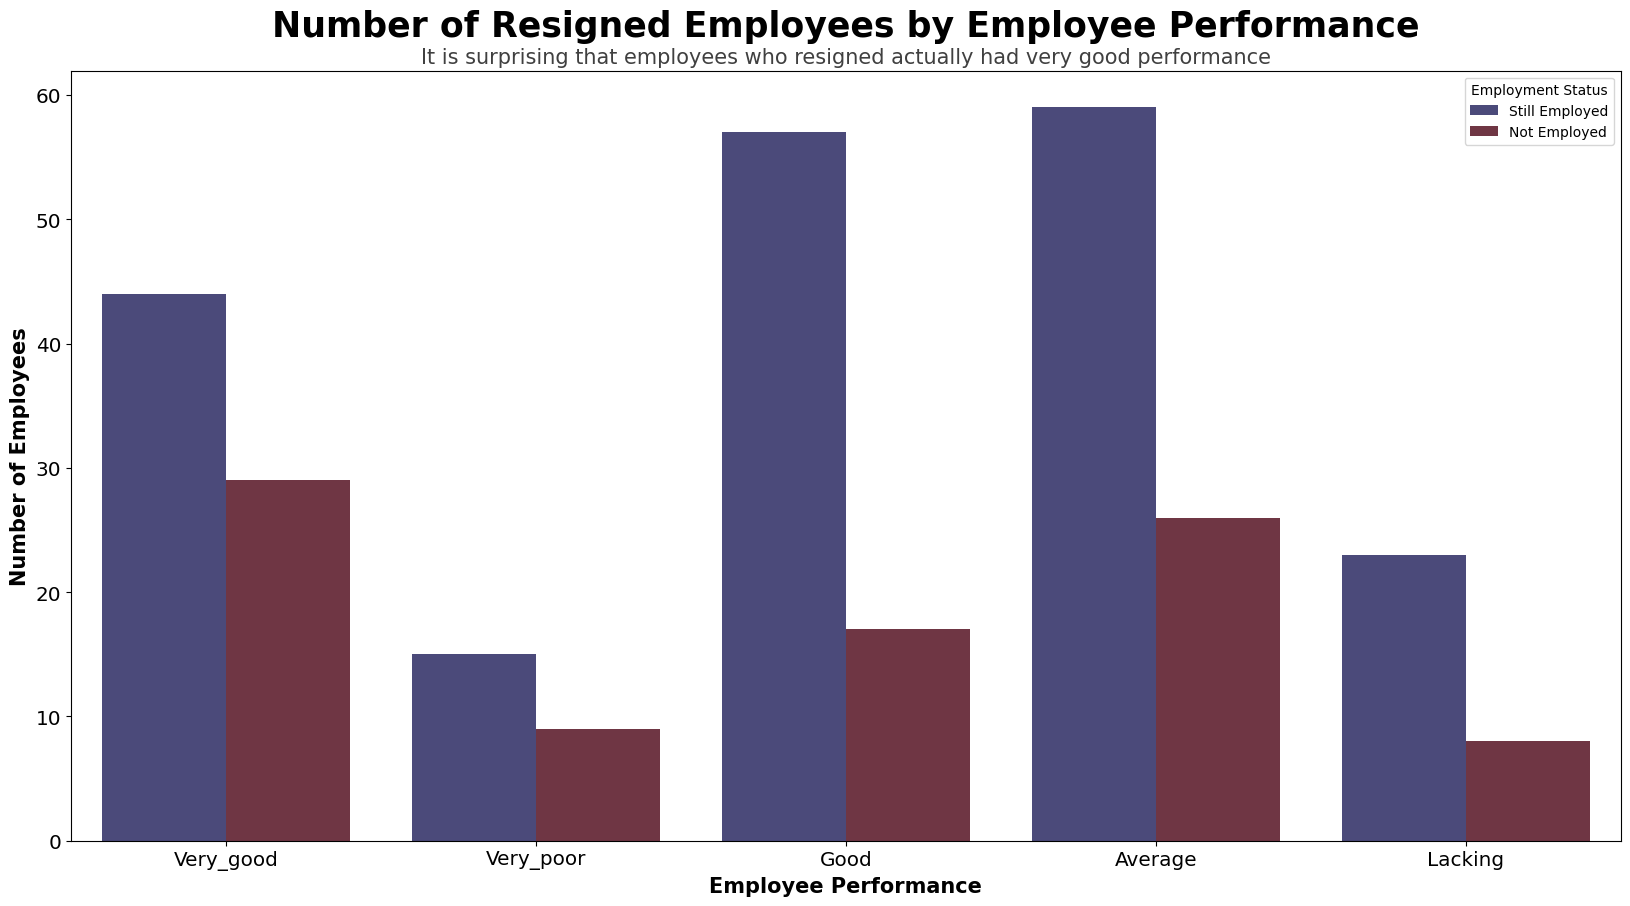

In [53]:
# Create the bar chart with hue based on "EmploymentStatus"
sns.countplot(data=df, x='EmployeePerformance', hue='EmploymentStatus', palette='icefire')

# Set the title for the plot
x_start, x_end = plt.gca().get_xlim()
y_start, y_end = plt.gca().get_ylim()
desc = 'It is surprising that employees who resigned actually had very good performance'
plt.text((x_start + x_end) / 2, y_end * 1.01, desc, ha='center', fontsize=15, alpha=0.75)

plt.xlabel('Employee Performance', fontsize=15, fontweight='bold')
plt.ylabel('Number of Employees', fontsize=15, fontweight='bold')
plt.title('Number of Resigned Employees by Employee Performance', fontsize=25, fontweight='bold', pad=25)

plt.xticks(rotation=0)
plt.legend(title='Employment Status')
plt.show()


###Resign Reason Analysis for Employee Attrition Management Strategy

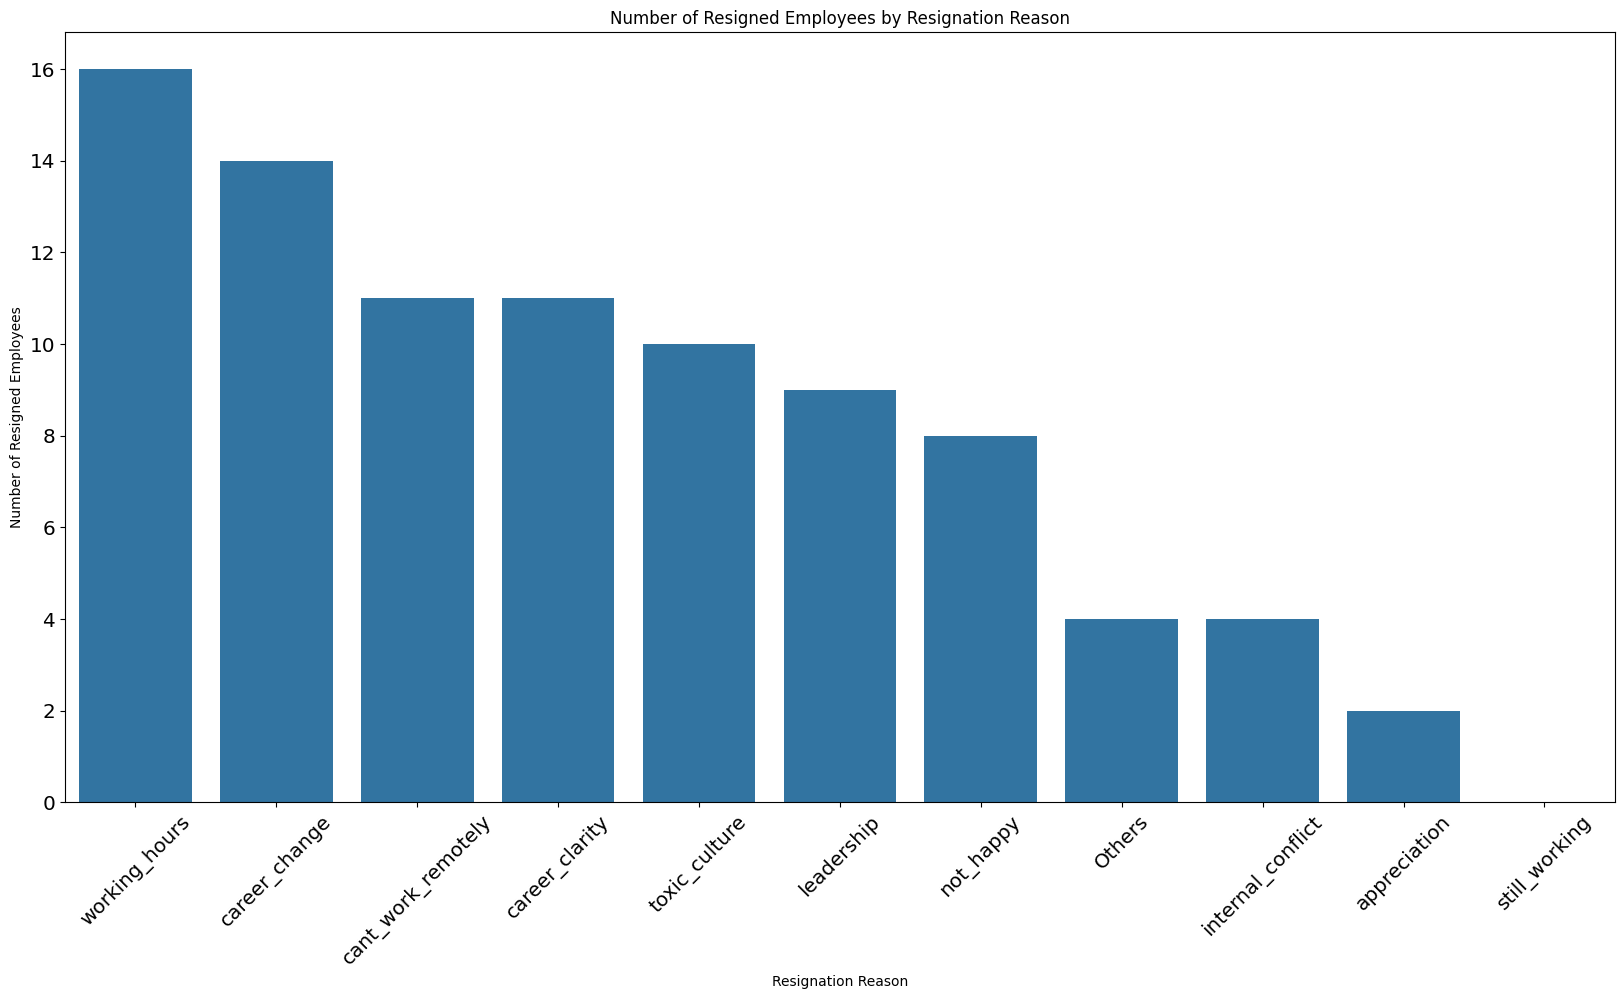

In [62]:
# Check Employment Status counts
# print(df['EmploymentStatus'].value_counts())

# Create the df_resigned DataFrame with appropriate filtering
# Adjust this line based on correct resignation status
df_resigned = df[df['EmploymentStatus'] == 'Not Employed']  # Assuming this indicates resignation

# Validate df_resigned after filtering
# print(df_resigned.head())  # Check if this DataFrame has any data
# print(df_resigned['ResignationReason'].unique())  # Check resignation reasons

# Plotting if there are valid resignation reasons
if not df_resigned.empty:
    resignation_reason_counts = df_resigned['ResignationReason'].value_counts()
    sns.countplot(x='ResignationReason', data=df_resigned, order=resignation_reason_counts.index)
    plt.xlabel('Resignation Reason')
    plt.ylabel('Number of Resigned Employees')
    plt.title('Number of Resigned Employees by Resignation Reason')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No resignation reasons available for plotting.")


#**Build an Automated Resignation Behavior Prediction using Machine Learning**



In [63]:
# Detect missing values in rows and columns
missing_rows = df.isnull().sum(axis=1)
missing_columns = df.isnull().sum(axis=0)

print('Total empty rows:', missing_rows)


Total empty rows: 0      2
1      0
2      0
3      2
4      0
      ..
282    2
283    0
284    0
285    0
286    2
Length: 287, dtype: int64


In [64]:
print("Total empty columns:", missing_columns)

Total empty columns: Username                           0
EnterpriseID                       0
MaritalStatus                      0
Gender                             0
EmploymentStatus                   0
Occupation                         0
CareerLevel                        0
EmployeePerformance                0
RegionOfOrigin                     0
HiringPlatform                     0
EngagementSurveyScore              0
EmployeeSatisfactionScore          0
NumberOfProjectParticipations      0
NumberOfLateArrivalsLastMonth      0
NumberOfAbsences                   0
PhoneNumber                        0
Email                              0
EducationLevel                     0
HasWorkExperience                  0
JoinedLOPProgram                   0
ResignationReason                  0
DateOfBirth                        0
HiringDate                         0
EmployeeEvaluationDate             0
ResignationDate                  198
HiringYear                         0
HiringMonth      

In [65]:
# Detect duplicate data
duplicate_rows = df.duplicated()

print("Total occurrences of duplicate data:", duplicate_rows.sum())


Total occurrences of duplicate data: 0


In [82]:
# Columns for one-hot encoding
one_hot_columns = ['MaritalStatus', 'Gender', 'CareerLevel', 'RegionOfOrigin', 'HiringPlatform', 'EducationLevel', 'AgeCategory']

# Columns for label encoding
label_encode_columns = ['Occupation', 'HasWorkExperience', 'ResignationReason', 'EmployeePerformance', 'EmploymentStatus']

# Initialize df_encoded
df_encoded = df.copy()  # Ensure df_encoded is a copy of df

# Verify the columns present in df_encoded
print("Columns in df_encoded:", df_encoded.columns.tolist())

# Check for missing columns
missing_columns = set(one_hot_columns) - set(df_encoded.columns)
if missing_columns:
    print(f"Missing columns for one-hot encoding: {missing_columns}")
else:
    # One-hot encoding
    df_encoded = pd.get_dummies(df_encoded, columns=one_hot_columns)

    # Label encoding
    from sklearn.preprocessing import LabelEncoder

    label_encoder = LabelEncoder()
    for column in label_encode_columns:
        if column in df_encoded.columns:
            df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
        else:
            print(f"Column '{column}' is missing for label encoding.")

Columns in df_encoded: ['Username', 'EnterpriseID', 'MaritalStatus', 'Gender', 'EmploymentStatus', 'Occupation', 'CareerLevel', 'EmployeePerformance', 'RegionOfOrigin', 'HiringPlatform', 'EngagementSurveyScore', 'EmployeeSatisfactionScore', 'NumberOfProjectParticipations', 'NumberOfLateArrivalsLastMonth', 'NumberOfAbsences', 'PhoneNumber', 'Email', 'EducationLevel', 'HasWorkExperience', 'JoinedLOPProgram', 'ResignationReason', 'DateOfBirth', 'HiringDate', 'EmployeeEvaluationDate', 'ResignationDate', 'HiringYear', 'HiringMonth', 'HiringDay', 'ResignationYear', 'EmployeeAge', 'AgeCategory', 'TimeInPosition']


In [77]:
# Removing unnecessary columns
columns_to_drop = ['Username', 'EnterpriseID', 'PhoneNumber', 'Email', 'DateOfBirth', 'HiringDate', 'EmployeeEvaluationDate', 'ResignationDate', 'ResignationYear']
df_encoded.drop(columns_to_drop, axis=1, inplace=True)


In [78]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Occupation                              287 non-null    int64  
 1   EmployeePerformance                     287 non-null    int64  
 2   EngagementSurveyScore                   287 non-null    int64  
 3   EmployeeSatisfactionScore               287 non-null    float64
 4   NumberOfProjectParticipations           287 non-null    float64
 5   NumberOfLateArrivalsLastMonth           287 non-null    float64
 6   NumberOfAbsences                        287 non-null    float64
 7   HasWorkExperience                       287 non-null    int64  
 8   JoinedLOPProgram                        287 non-null    float64
 9   ResignationReason                       287 non-null    int64  
 10  HiringYear                              287 non-null    int32 

In [83]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler object
scaler = MinMaxScaler()

# Perform Min-Max normalization on numeric features
numeric_features = ['EngagementSurveyScore', 'EmployeeSatisfactionScore', 'NumberOfProjectParticipations', 'NumberOfLateArrivalsLastMonth', 'NumberOfAbsences']
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

In [88]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
# Create an instance of SelectKBest with k=40 and chi-squared scoring function
k = 15
selector = SelectKBest(score_func=chi2, k=k)

# 'EmploymentStatus' is now label encoded and should be present in df_encoded
X = df_encoded.drop(['EmploymentStatus'], axis=1)
y = df_encoded['EmploymentStatus']

# Before applying SelectKBest, ensure all columns in X are numeric:
X = X.select_dtypes(include=['number']) # Select only numeric columns

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean') # or strategy='median'
X_imputed = imputer.fit_transform(X) # Store imputed data in a separate variable

# Convert the imputed NumPy array back to a Pandas DataFrame to preserve column names
X = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)

# Create an instance of SelectKBest with k=40 and chi-squared scoring function
k = 15
selector = SelectKBest(score_func=chi2, k=k)

# Fit the selector to your data and transform your features
X_new = selector.fit_transform(X, y)
# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
# Now X has columns attribute after conversion back to DataFrame
selected_feature_names = X.columns[selected_feature_indices]

# Print the names of the selected features
print("Selected features:")
print(selected_feature_names)

Selected features:
Index(['EnterpriseID', 'Occupation', 'EmployeePerformance',
       'EngagementSurveyScore', 'EmployeeSatisfactionScore',
       'NumberOfProjectParticipations', 'NumberOfLateArrivalsLastMonth',
       'NumberOfAbsences', 'JoinedLOPProgram', 'ResignationReason',
       'HiringYear', 'HiringMonth', 'HiringDay', 'EmployeeAge',
       'TimeInPosition'],
      dtype='object')


##Modelling

###Create a loop for model comparasion

In [89]:
# Assuming you have your features (X) and target (y) ready
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the split details
print("Data Split Details:")
print(f"Total Samples: {len(X)}")
print(f"Training Samples: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%)")
print(f"Testing Samples: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%)")

Data Split Details:
Total Samples: 287
Training Samples: 229 (79.79%)
Testing Samples: 58 (20.21%)


In [90]:
# Perform feature selection on the training data
k = 15
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Create a list of models
models = [
    ("Support Vector Machine", SVC(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42))
]

# Train and evaluate all models with feature selection
for model_name, model in models:
    model.fit(X_train_selected, y_train)  # Train the model with selected features

    y_pred = model.predict(X_test_selected)  # Make predictions on the test data with selected features

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC:", roc_auc)
    print("\n")

Model: Support Vector Machine
Accuracy: 0.6724137931034483
Precision: 0.6724137931034483
Recall: 1.0
F1 Score: 0.8041237113402062
ROC AUC: 0.5


Model: Gradient Boosting
Accuracy: 0.9482758620689655
Precision: 0.9736842105263158
Recall: 0.9487179487179487
F1 Score: 0.961038961038961
ROC AUC: 0.9480431848852902


Model: Decision Tree
Accuracy: 0.9310344827586207
Precision: 0.972972972972973
Recall: 0.9230769230769231
F1 Score: 0.9473684210526315
ROC AUC: 0.9352226720647774


Model: Random Forest
Accuracy: 0.9137931034482759
Precision: 0.9047619047619048
Recall: 0.9743589743589743
F1 Score: 0.9382716049382716
ROC AUC: 0.8819163292847504


Model: Logistic Regression
Accuracy: 0.6379310344827587
Precision: 0.6607142857142857
Recall: 0.9487179487179487
F1 Score: 0.7789473684210526
ROC AUC: 0.47435897435897434




from all of the model that i run, it seemsed like the Gradient boosting🚀, have an excellent Precision, Recall, and one of the most important is ROC.

so that we know that Gradient Boosting is a perfect model for this project, we are gonna cross validation and create a hyperparameter to actually boosting the performance.

###Print all the result for Gradient Boosting model

In [91]:
# Create the Gradient Boosting model
model = GradientBoostingClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print the evaluation metrics
print(f'confusion matrix: \n {conf_matrix}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

confusion matrix: 
 [[19  0]
 [ 0 39]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00


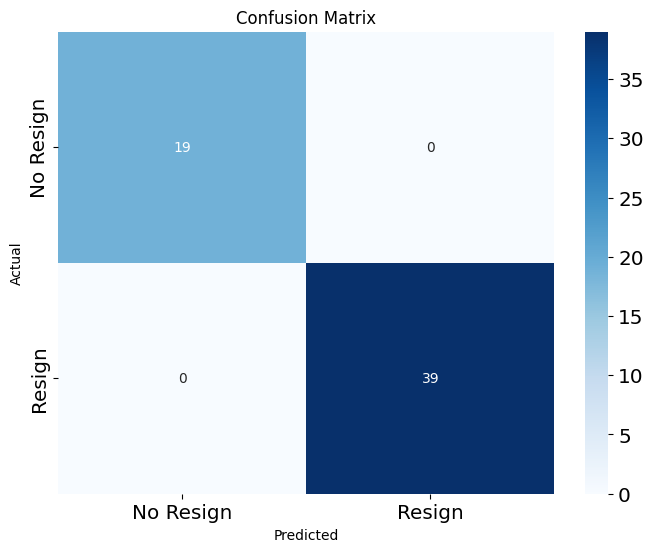

In [92]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Resign', 'Resign'], yticklabels=['No Resign', 'Resign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###Checking the cross validation

In [93]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, roc_auc_score

# Create your Gradient Boosting model
model = GradientBoostingClassifier()

# Specify the evaluation metrics you want to use
scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': make_scorer(roc_auc_score)
}

# Perform 10-fold cross-validation
cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)

# Calculate the mean and standard deviation of precision, recall, and ROC-AUC scores
precision_mean = cv_results['test_precision'].mean()
precision_std = cv_results['test_precision'].std()
recall_mean = cv_results['test_recall'].mean()
recall_std = cv_results['test_recall'].std()
roc_auc_mean = cv_results['test_roc_auc'].mean()
roc_auc_std = cv_results['test_roc_auc'].std()

# Print the results
print(f'Mean Precision: {precision_mean:.2f} (±{precision_std:.2f})')
print(f'Mean Recall: {recall_mean:.2f} (±{recall_std:.2f})')
print(f'Mean ROC-AUC: {roc_auc_mean:.2f} (±{roc_auc_std:.2f}')

Mean Precision: 1.00 (±0.00)
Mean Recall: 1.00 (±0.00)
Mean ROC-AUC: 1.00 (±0.00


These results suggest that the model demonstrates strong precision and recall scores, indicating its ability to correctly classify positive cases while minimizing false positives and false negatives. Additionally, the high ROC-AUC score reflects the model's excellent overall discrimination ability.

###Setting the Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Create your Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [3, 6, 9],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9]
}

# Define the scoring method (ROC-AUC)
scoring = 'roc_auc'

# Create the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=10)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_roc_auc = grid_search.best_score_

print("Best Hyperparameters:")
print(best_params)
print(f"Best Mean ROC-AUC: {best_roc_auc:.2f}")

These results indicate that the model demonstrates exceptional predictive power, with the ROC-AUC score reaching its highest possible value of 1.00. The choice of hyperparameters and the resulting ROC-AUC score underscore the model's strong ability to distinguish between positive and negative cases with perfect discrimination.

In summary, the model, fine-tuned with the identified hyperparameters, excels in its classification performance and is well-suited for tasks requiring high predictive accuracy.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting model with the specified hyperparameters
best_params = {
    'learning_rate': 0.01,
    'max_depth': 4,
    'min_samples_leaf': 5,
    'min_samples_split': 3,
    'n_estimators': 50,
    'subsample': 0.8
}

model = GradientBoostingClassifier(**best_params)

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision
precision = precision_score(y_test, y_pred)
# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate F1 score
f1 = f1_score(y_test, y_pred)
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print the evaluation metrics
print(f'confusion matrix: \n {conf_matrix}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

###Visualize the Plot After Hyperparameter

In [ ]:
confusion_matrix = [[39, 0],
                    [1, 18]]

# Create a heatmap
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

# Set labels for the x and y axes
plt.title('Confusion Matrix Gradient Boosting \n After Hyperparameter')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()

In [ ]:
# Train your GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Get feature importances
feature_importance = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by Importance in ascending order
sorted_feature_df = feature_df.sort_values(by='Importance', ascending=True)

# Plot the top 10 feature importances in a bar chart
top_features = sorted_feature_df.tail(10)  # Get the top 10 features
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Ascending Order)')
plt.show()

fromt the plot above it is really explainatory because we reallly trying focus on how we try to improving retention prediction and the most feature importance there is, is actually AlasanResign (Resign Reason) and a worker from Jakarta selatan:

here are some of my assumptions and hypotheses that can be derived:

1. **AlasanResign (Reason for Resignation)**: The high importance of the "AlasanResign" feature suggests that the specific reasons employees provide for their resignation play a crucial role in predicting attrition. Assumptions related to this feature could include:
* Certain reasons, such as career advancement opportunities or dissatisfaction with the work environment, might be more strongly associated with resignations.

* Employees who resign due to personal reasons may exhibit different retention patterns compared to those resigning for professional growth.

2. **AsalKota_Jakarta Selatan (Origin: South Jakarta)**: The significance of the "AsalKota_Jakarta Selatan" feature implies that the geographic location of employees' origins is a noteworthy factor. Assumptions related to this feature may include:
* Employees from South Jakarta may face unique challenges or opportunities in their work environment, leading to different retention behaviors.

* Factors such as commute times or access to job opportunities in South Jakarta could affect employee retention.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:,1])

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming df_encoded contains your dataset
X = df_encoded.drop(['EmploymentStatus'], axis=1)  # Updated column name
y = df_encoded['EmploymentStatus']  # Updated column name

# Create and fit a Decision Tree model
model = DecisionTreeClassifier()
model.fit(X, y)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Employed", "Unemployed"])  # Translated class names
plt.show()


In [ ]:
!pip install shap
import shap

# Train your Gradient Boosting model (replace with your model)
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Initialize a SHAP explainer
explainer = shap.Explainer(gb_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test, show=False)
plt.title('SHAP Summary Plot for Gradient Boosting Model')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import shap


# Create and compile your neural network model (replace with your model)
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train your neural network model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Convert X_test from DataFrame to a NumPy array
X_test_array = X_test.values

# Get the column names from X_test
feature_names = X_test.columns

# Initialize an Integrated Gradients explainer
explainer = shap.GradientExplainer(model, X_train)

# Calculate SHAP values
shap_values, indexes = explainer.shap_values(X_test_array, ranked_outputs=1)

# Summary plot (global feature importance) with feature names
shap.summary_plot(shap_values, X_test_array, feature_names=feature_names, show=False)
plt.title('SHAP Summary Plot for Neural Network Model')
plt.show()